# Ejercicio 1: Ciclo de Rankine Ideal
Un ciclo de Rankine ideal trabaja con vapor de agua. El vapor entra a la turbina saturado y a una
presión de 8 MPa. El vapor entra al condensador a una presión de 0.008 MPa, y sale hacia la bomba
como líquido saturado. El trabajo neto del ciclo es de 100 MW. 

Se pide:

a) Cálculo de todos los estados del ciclo

b) El rendimiento térmico en % (ηth)

c) El ratio de trabajo de retorno en % (back work ratio, bwr)

d) El flujo másico de vapor en kg/s (ṁ)

e) Los calores intercambiados en MW (Qin y Qout)

f) Los trabajos de la turbina y la bomba en MW (Wp y Wt)

g) Dibujo del ciclo de vapor

In [34]:
import seuif97 as seu

In [35]:
# a) Cálculo de todos los estados del ciclo 
# Se utilizará el sufijo '_id' para los procesos afectados por el carácter isoentrópico


# Estado 1 
# Queda definido por dos puntos dados: la presión de trabajo de la caldera y el título de vapor de entrada a la turbina
# Con esto, solo queda hallar el resto de variables a partir de la librería

p1=8
x1=1

h1=seu.px2h(p1,x1)
s1=seu.px2s(p1,x1)
v1=seu.px2v(p1,x1)
t1=seu.px2t(p1,x1)

print(" p1= {} Mpa \n v1= {} m3/kg \n x1= {} p.u \n t1= {} ºC \n h1= {} KJ/Kg \n s1= {} KJ/Kg*K".format(p1,v1,x1,t1,h1,s1))

print("-----------------------------------")


# Estado 2 ideal
# Se supone idealidad para una expansión isoentrópica en la turbina: s=cte, s2=s1 
# Este dato, junto con una presión de salida dada, permite definir el estado y hallar las variables restantes 

s2_id=s1
p2_id=0.008

h2_id=seu.ps2h(p2_id,s2_id)
v2_id=seu.ps2v(p2_id,s2_id)
t2_id=seu.ps2t(p2_id,s2_id)
x2_id=seu.ps2x(p2_id,s2_id)

print(" p2_id= {} Mpa \n v2_id= {} m3/kg \n x2_id= {} p.u \n t2_id= {} ºC \n h2_id= {} KJ/Kg \n s2_id= {} KJ/Kg*K".format(p2_id,v2_id,x2_id,t2_id,h2_id,s2_id))

print("-----------------------------------")


# Estado 3 
# Queda definido por el carácter isobaro del condensador; p=cte a la entrada y salida 
# y la necesidad de obtener un líquido ideal caloríficamente perfecto para hacer posible el trabajo de la bomba.
# Para ello, el título de vapor debe ser un 0%

p3=p2_id
x3=0

h3=seu.px2h(p3,x3)
v3=seu.px2v(p3,x3)
t3=seu.px2t(p3,x3)
s3=seu.px2s(p3,x3)

print(" p3= {} Mpa \n v3= {} m3/kg \n x3= {} p.u \n t3= {} ºC \n h3= {} KJ/Kg \n s3= {} KJ/Kg*K".format(p3,v3,x3,t3,h3,s3))

print("-----------------------------------")


# Estado 4 ideal
# Se halla de manera idéntica que el estado 2 para obtener la entropía y, posteriormente, 
# cambiando la presión a la de trabajo de la caldera

p4_id=p1
s4_id=s3

h4_id=seu.ps2h(p4_id,s4_id)
v4_id=seu.ps2v(p4_id,s4_id)
t4_id=seu.ps2t(p4_id,s4_id)
x4_id=seu.ps2x(p4_id,s4_id)

print(" p4_id= {} Mpa \n v4_id= {} m3/kg \n x4_id= {} p.u \n t4_id= {} ºC \n h4_id= {} KJ/Kg \n s4_id= {} KJ/Kg*K".format(p4_id,v4_id,x4_id,t4_id,h4_id,s4_id))

 p1= 8 Mpa 
 v1= 0.02352753165643739 m3/kg 
 x1= 1 p.u 
 t1= 295.00912125631703 ºC 
 h1= 2758.611080680434 KJ/Kg 
 s1= 5.744848808940075 KJ/Kg*K
-----------------------------------
 p2_id= 0.008 Mpa 
 v2_id= 12.214543575697041 m3/kg 
 x2_id= 0.6748393810242206 p.u 
 t2_id= 41.51005270424139 ºC 
 h2_id= 1795.0770367371815 KJ/Kg 
 s2_id= 5.744848808940075 KJ/Kg*K
-----------------------------------
 p3= 0.008 Mpa 
 v3= 0.0010084729266462307 m3/kg 
 x3= 0 p.u 
 t3= 41.51005270424139 ºC 
 h3= 173.8517685972624 KJ/Kg 
 s3= 0.592531583591964 KJ/Kg*K
-----------------------------------
 p4_id= 8 Mpa 
 v4_id= 0.001005058770876371 m3/kg 
 x4_id= 0.0 p.u 
 t4_id= 41.75196883675659 ºC 
 h4_id= 181.89778626716353 KJ/Kg 
 s4_id= 0.592531583591964 KJ/Kg*K


In [36]:
# b) El rendimiento térmico en % (ηth)
# Para el cálculo se tiene en cuenta el trabajo neto, que en el caso presente  está formado por 
# 'W_turbine-W_pump' dividido entre 'Q_in' (=Qcald). Se utilizan valores específicos al no conocer el flujo másico.

ηth_id=100*(h1-h2_id+h3-h4_id)/(h1-h4_id)

print(" ηth_id= {} %".format(ηth_id))

 ηth_id= 37.08165857431649 %


In [37]:
# c) El ratio de trabajo de retorno en % (back work ratio, bwr)
# Se halla dividiendo 'W_pump' entre 'W_turbine'. Aporta una idea de qué porcentaje de trabajo de la turbina se dedica
# para hacer funcionar la bomba y, por lo tanto, deja de ser aprovechado para el giro del alternador

bwr_id=100*(h4_id-h3)/(h1-h2_id)

print(" bwr_id= {} %".format(bwr_id))

 bwr_id= 0.8350527644018554 %


In [38]:
# d) El flujo másico de vapor en kg/s (ṁ)
# Utilizando la potencia dada del ciclo, que es 'Ẇ_turbine-Ẇ_pump', (para términos de potencia, no específicos),  
# se puede despejar de la ecuación de la potencia mecánica total.

Ẇ_cycle=100000

ṁ_id=Ẇ_cycle/(h1-h2_id+h3-h4_id)

print(" ṁ_id={} kg/s".format(ṁ_id))

 ṁ_id=104.65855902980351 kg/s


In [39]:
# e) Los calores intercambiados en MW (Q̇in y Q̇out)
# Para los cálculos de potencias caloríficas y potencias mecánicas, basta con multiplicar el flujo másico por las 
# entalpías de entrada y salida de los dispositivos a hallar 

Q̇in_id=ṁ_id*(h1-h4_id)/1000
Q̇out_id=ṁ_id*(h2_id-h3)/1000

print(" Q̇in_id= {} MW \n Q̇out_id= {} MW".format(Q̇in_id,Q̇out_id))

 Q̇in_id= 269.67510042623076 MW 
 Q̇out_id= 169.67510042623076 MW


In [40]:
# f) Los trabajos de la turbina y la bomba en MW (Ẇt y Ẇp)

Ẇt_id=ṁ_id*(h1-h2_id)/1000
Ẇp_id=ṁ_id*(h4_id-h3)/1000

print(" Ẇt_id= {} MW \n Ẇp_id= {} MW".format(Ẇt_id,Ẇp_id))

 Ẇt_id= 100.84208461526019 MW 
 Ẇp_id= 0.8420846152601883 MW


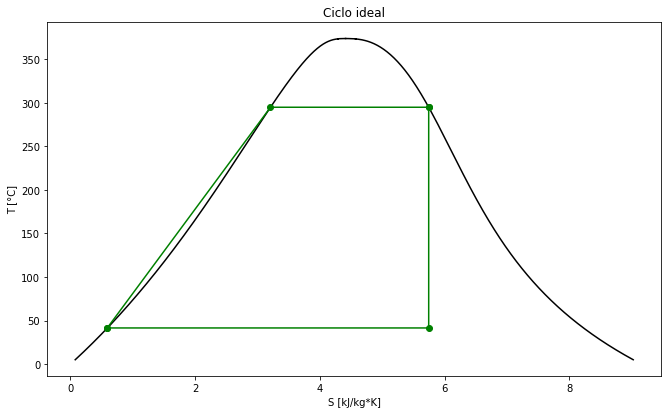

In [41]:
# g) Dibujo del ciclo de vapor

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Código para el tamaño del gráfico
plt.figure(figsize=(11.0,6.5))

# Código para el nombre de los ejes y el título
plt.title("Ciclo ideal")
plt.xlabel('S [kJ/kg*K]')
plt.ylabel('T [°C]')

# Código para los puntos de saturación y su color (campana)
npt = np.linspace(5,647.096-273.15,5000)
svap=[s for s in [seu.tx2s(t, 1) for t in npt]]
sliq=[s for s in [seu.tx2s(t, 0) for t in npt]]
plt.plot(svap, npt, 'k')
plt.plot(sliq, npt, 'k')

# Le indicamos los puntos a señalar y unir
t=[t1,t2_id,t3,t4_id]
s=[s1,s2_id,s3,s4_id]

t.append(seu.px2t(p1,0))
s.append(seu.px2s(p1,0))

t.append(t1)
s.append(s1)

plt.plot(s, t, 'go-')

# Nota: en todas las representaciones gráficas se omiten los puntos de salida de las bombas (en este caso sería el 4) 
# debido a que al graficarlos son prácticamente coincidentes con el de entrada (no se aprecia diferencia) y entorpecen
# la visualización. En ningún momento se han olvidado.
# Además, se remarcan todos los puntos de corte con la campana por facilidad personal para unirlos y representación
# del ciclo.

# Ejercicio 2: Ciclo de Rankine con irreversibilidades
Partiendo de las condiciones del ejercicio anterior, realizar los mismos apartados para un ciclo con
irreversibilidades donde el rendimiento de la turbina (ηt) es 0.85 y el de la bomba (ηp) es 0.85.

Se pide:

a) Cálculo de todos los estados del ciclo

b) El rendimiento térmico en % (ηth)

c) El ratio de trabajo de retorno en % (back work ratio, bwr)

d) El flujo másico de vapor en kg/s (ṁ)

e) Los calores intercambiados en MW (Qin y Qout)

f) Los trabajos de la turbina y la bomba en MW (Wp y Wt)

g) Dibujo del ciclo de vapor

In [42]:
# a) Cálculo de todos los estados del ciclo
# Se utilizará el sufijo '_r' para los procesos afectados por el carácter irreversible
# Existen variables iguales en cuanto a definición y método de obtención con respecto al ejercicio anterior que no
# reciben comentarios porque se suponen sobreentendidas.

# Para este ejercicio, al tener mismos valores de entrada que el anterior, el estado 1 y el estado 3 serán idénticos
# y solo es necesario importarlos del cálculo ya hecho antes.


# Estado 1

print(" p1= {} Mpa \n v1= {} m3/kg \n x1= {} p.u \n t1= {} ºC \n h1= {} KJ/Kg \n s1= {} KJ/Kg*K".format(p1,v1,x1,t1,h1,s1))

print("-----------------------------------")


# Estado 2 real
# Para calcularlo, se utiliza la definición del rendimiento en la turbina. 
# ηturb=(h1-h2_r)/(h1-h2_id); con todo conocido excepto la entalpía que se busca y que es posible despejar: h2_r

ηturb=0.85

p2_r=0.008
h2_r=h1-(ηturb*(h1-h2_id))

s2_r=seu.ph2s(p2_r,h2_r)
v2_r=seu.ph2v(p2_r,h2_r)
t2_r=seu.ph2t(p2_r,h2_r)
x2_r=seu.ph2x(p2_r,h2_r)

print(" p2_r= {} Mpa \n v2_r= {} m3/kg \n x2_r= {} p.u \n t2_r= {} ºC \n h2_r= {} KJ/Kg \n s2_r= {} KJ/Kg*K".format(p2_r,v2_r,x2_r,t2_r,h2_r,s2_r))

print("-----------------------------------")


# Estado 3

print(" p3= {} Mpa \n v3= {} m3/kg \n x3= {} p.u \n t3= {} ºC \n h3= {} KJ/Kg \n s3= {} KJ/Kg*K".format(p3,v3,x3,t3,h3,s3))

print("-----------------------------------")


# Estado 4 real
# Para calcularlo, se utiliza la definición del rendimiento en la bomba. 
# ηpump=(h4_id-h3)/(h4_r-h3); con todo conocido excepto la entalpía que se busca y que es posible despejar: h4_r

ηpump=0.85

p4_r=p1
h4_r=h3+((h4_id-h3)/ηpump)

s4_r=seu.ph2s(p4_r,h4_r)
v4_r=seu.ph2v(p4_r,h4_r)
t4_r=seu.ph2t(p4_r,h4_r)
x4_r=seu.ph2x(p4_r,h4_r)

print(" p4_r= {} Mpa \n v4_r= {} m3/kg \n x4_r= {} p.u \n t4_r= {} ºC \n h4_r= {} KJ/Kg \n s4_r= {} KJ/Kg*K".format(p4_r,v4_r,x4_r,t4_r,h4_r,s4_r))

 p1= 8 Mpa 
 v1= 0.02352753165643739 m3/kg 
 x1= 1 p.u 
 t1= 295.00912125631703 ºC 
 h1= 2758.611080680434 KJ/Kg 
 s1= 5.744848808940075 KJ/Kg*K
-----------------------------------
 p2_r= 0.008 Mpa 
 v2_r= 13.303364213366702 m3/kg 
 x2_r= 0.7350004268630066 p.u 
 t2_r= 41.51005270424139 ºC 
 h2_r= 1939.6071433286693 KJ/Kg 
 s2_r= 6.204171132868007 KJ/Kg*K
-----------------------------------
 p3= 0.008 Mpa 
 v3= 0.0010084729266462307 m3/kg 
 x3= 0 p.u 
 t3= 41.51005270424139 ºC 
 h3= 173.8517685972624 KJ/Kg 
 s3= 0.592531583591964 KJ/Kg*K
-----------------------------------
 p4_r= 8 Mpa 
 v4_r= 0.001005196435764367 m3/kg 
 x4_r= 0.0 p.u 
 t4_r= 42.093300748692855 ºC 
 h4_r= 183.31767173832256 KJ/Kg 
 s4_r= 0.5970381178051598 KJ/Kg*K


In [43]:
# b) El rendimiento térmico en % (ηth)
# Debe ser de menor valor que el proceso ideal al contar con pérdidas en los dispositivos

ηth_r=100*(h1-h2_r+h3-h4_r)/(h1-h4_r)

print(" ηth_r= {} %".format(ηth_r))

 ηth_r= 31.43478841672063 %


In [44]:
# c) El ratio de trabajo de retorno en % (back work ratio, bwr)

bwr_r=100*(h4_r-h3)/(h1-h2_r)

print(" bwr_r= {} %".format(bwr_r))

 bwr_r= 1.1557823728745418 %


In [45]:
# d) El flujo másico de vapor en kg/s (ṁ)

ṁ_r=Ẇ_cycle/(h1-h2_r+h3-h4_r)

print(" ṁ_r={} kg/s".format(ṁ_r))

 ṁ_r=123.52724118453493 kg/s


In [46]:
# e) Los calores intercambiados en MW (Q̇in y Q̇out)

Q̇in_r=ṁ_r*(h1-h4_r)/1000
Q̇out_r=ṁ_r*(h2_r-h3)/1000

print(" Q̇in_r= {} MW \n Q̇out_r= {} MW".format(Q̇in_r,Q̇out_r))

 Q̇in_r= 318.11889004733536 MW 
 Q̇out_r= 218.11889004733536 MW


In [47]:
# f) Los trabajos de la turbina y la bomba en MW (Ẇp y Ẇt)

Ẇt_r=ṁ_r*(h1-h2_r)/1000
Ẇp_r=ṁ_r*(h4_r-h3)/1000

print(" Ẇt_r= {} MW \n Ẇp_r= {} MW".format(Ẇt_r,Ẇp_r))

 Ẇt_r= 101.16929690033517 MW 
 Ẇp_r= 1.1692969003351843 MW


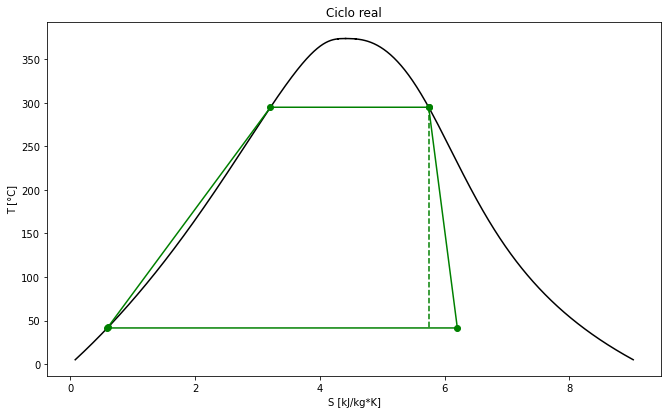

In [48]:
# g) Dibujo del ciclo de vapor

# Código para el tamaño del gráfico
plt.figure(figsize=(11.0,6.5))

# Código para el nombre de los ejes y el título
plt.title("Ciclo real")
plt.xlabel('S [kJ/kg*K]')
plt.ylabel('T [°C]')

# Código para los puntos de saturación y su color (campana)
svap=[s for s in [seu.tx2s(t, 1) for t in npt]]
sliq=[s for s in [seu.tx2s(t, 0) for t in npt]]
plt.plot(svap, npt, 'k')
plt.plot(sliq, npt, 'k')

# Le indicamos los puntos a señalar y unir
t=[t1,t2_r,t3,t4_r]
s=[s1,s2_r,s3,s4_r]

t.append(seu.px2t(p1,0))
s.append(seu.px2s(p1,0))

t.append(t1)
s.append(s1)

plt.plot(s, t, 'go-')

# Se añade la representación de la expansión isoentrópica en la turbina para poder comparar la diferencia entre el 
# proceso real y el ideal
tb=[t1,t2_id]
sb=[s1,s2_id]
plt.plot(sb, tb, 'g--')

# Ejercicio 3: Ciclo de Rankine con sobrecalentamiento
Un ciclo de Rankine con irreversibilidades trabaja con vapor de agua. El vapor entra a la turbina a
una temperatura de 450 ºC y a una presión de 8 MPa. El vapor entra al condensador a una presión
de 0.008 MPa, y sale hacia la bomba como líquido saturado. El trabajo neto del ciclo es de 100
MW. Los rendimientos de la turbina (ηt) y de la bomba (ηp) son ambos 0.85. 

Se pide:

a) Cálculo de todos los estados del ciclo

b) El rendimiento térmico en % (ηth)

c) El ratio de trabajo de retorno en % (back work ratio, bwr)

d) El flujo másico de vapor en kg/s (ṁ)

e) Los calores intercambiados en MW (Qin y Qout)

f) Los trabajos de la turbina y la bomba en MW (Wp y Wt)

g) Dibujo del ciclo de vapor

In [49]:
# a) Cálculo de todos los estados del ciclo
# Se utilizará el sufijo 's' para todas las variables del ciclo sobrecalentado


# Estado 1

p1s=8
t1s=450

h1s=seu.pt2h(p1s,t1s)
s1s=seu.pt2s(p1s,t1s)
v1s=seu.pt2v(p1s,t1s)
x1s=seu.pt2x(p1s,t1s)

print(" p1s= {} Mpa \n v1s= {} m3/kg \n x1s= {} p.u \n t1s= {} ºC \n h1s= {} KJ/Kg \n s1s= {} KJ/Kg*K".format(p1s,v1s,x1s,t1s,h1s,s1s))

print("-----------------------------------")


# Estado 2 
# Para este estado no se cuenta con la entalpía ideal calculada como sí se tenía en el ejercicio 2, 
# por ello se hace necesario calcularla antes. 
# Se supone expansión isoentrópica en la turbina (s=cte) y se busca en la librería que entalpía corresponde a dicho punto
# Con ella y el rendimiento de la turbina, se calcula la entalpía real del estado

ηturbs=0.85

p2s=0.008
s2s_id=s1s
h2s_id=seu.ps2h(p2s,s2s_id)
h2s=h1s-(ηturbs*(h1s-h2s_id))

s2s=seu.ph2s(p2s,h2s)
v2s=seu.ph2v(p2s,h2s)
t2s=seu.ph2t(p2s,h2s)
x2s=seu.ph2x(p2s,h2s)

print(" p2s= {} Mpa \n v2s= {} m3/kg \n x2s= {} p.u \n t2s= {} ºC \n h2s= {} KJ/Kg \n s2s= {} KJ/Kg*K".format(p2s,v2s,x2s,t2s,h2s,s2s))

print("-----------------------------------")


# Estado 3

p3s=p2s
x3s=0

h3s=seu.px2h(p3s,x3s)
v3s=seu.px2v(p3s,x3s)
t3s=seu.px2t(p3s,x3s)
s3s=seu.px2s(p3s,x3s)

print(" p3s= {} Mpa \n v3s= {} m3/kg \n x3s= {} p.u \n t3s= {} ºC \n h3s= {} KJ/Kg \n s3s= {} KJ/Kg*K".format(p3s,v3s,x3s,t3s,h3s,s3s))

print("-----------------------------------")

# Estado 4
# Se produce el mismo caso que para el estado 2 pero con las variables y el modus operandi de la bomba

ηpumps=0.85

p4s=p1s
s4s_id=s3s
h4s_id=seu.ps2h(p4s,s4s_id)
h4s=h3s+((h4s_id-h3s)/ηpumps)

s4s=seu.ph2s(p4s,h4s)
v4s=seu.ph2v(p4s,h4s)
t4s=seu.ph2t(p4s,h4s)
x4s=seu.ph2x(p4s,h4s)

print(" p4s= {} Mpa \n v4s= {} m3/kg \n x4s= {} p.u \n t4s= {} ºC \n h4s= {} KJ/Kg \n s4s= {} KJ/Kg*K".format(p4s,v4s,x4s,t4s,h4s,s4s))

 p1s= 8 Mpa 
 v1s= 0.03819698603253424 m3/kg 
 x1s= 1.0 p.u 
 t1s= 450 ºC 
 h1s= 3273.2340290678903 KJ/Kg 
 s1s= 6.55767674925585 KJ/Kg*K
-----------------------------------
 p2s= 0.008 Mpa 
 v2s= 15.522685584048423 m3/kg 
 x2s= 0.8576254856590433 p.u 
 t2s= 41.51005270424139 ºC 
 h2s= 2234.1999744784293 KJ/Kg 
 s2s= 7.1403986567200395 KJ/Kg*K
-----------------------------------
 p3s= 0.008 Mpa 
 v3s= 0.0010084729266462307 m3/kg 
 x3s= 0 p.u 
 t3s= 41.51005270424139 ºC 
 h3s= 173.8517685972624 KJ/Kg 
 s3s= 0.592531583591964 KJ/Kg*K
-----------------------------------
 p4s= 8 Mpa 
 v4s= 0.001005196435764367 m3/kg 
 x4s= 0.0 p.u 
 t4s= 42.093300748692855 ºC 
 h4s= 183.31767173832256 KJ/Kg 
 s4s= 0.5970381178051598 KJ/Kg*K


In [50]:
# b) El rendimiento térmico en % (ηth)
# Debe ser ligeramente mayor al real debido al mayor área del ciclo sobrecalentado

ηths=100*(h1s-h2s+h3s-h4s)/(h1s-h4s)

print(" ηths= {} %".format(ηths))

 ηths= 33.32025959234042 %


In [51]:
# c) El ratio de trabajo de retorno en % (back work ratio, bwr)
# Debe ser ligeramente menor ya que es más eficiente

bwrs=100*(h4s-h3s)/(h1s-h2s)

print(" bwrs= {} %".format(bwrs))

 bwrs= 0.9110291524371915 %


In [52]:
# d) El flujo másico de vapor en kg/s (ṁ)

ṁs=Ẇ_cycle/(h1s-h2s+h3s-h4s)

print(" ṁs={} kg/s".format(ṁs))

 ṁs=97.1281015825126 kg/s


In [53]:
# e) Los calores intercambiados en MW (Q̇in y Q̇out)

Q̇ins=ṁs*(h1s-h4s)/1000
Q̇outs=ṁs*(h2s-h3s)/1000

print(" Q̇ins= {} MW \n Q̇outs= {} MW".format(Q̇ins,Q̇outs))

 Q̇ins= 300.11770983617356 MW 
 Q̇outs= 200.11770983617356 MW


In [54]:
# f) Los trabajos de la turbina y la bomba en MW (Ẇp y Ẇt)

Ẇts=ṁs*(h1s-h2s)/1000
Ẇps=ṁs*(h4s-h3s)/1000

print(" Ẇts= {} MW \n Ẇps= {} MW".format(Ẇts,Ẇps))

 Ẇts= 100.91940520185511 MW 
 Ẇps= 0.9194052018551155 MW


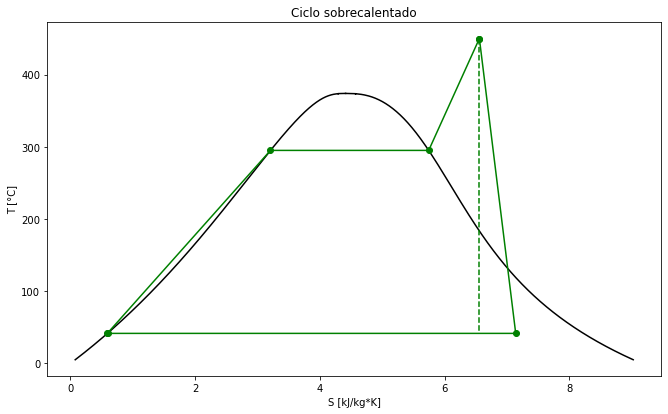

In [55]:
# g) Dibujo del ciclo de vapor

# Código para el tamaño del gráfico
plt.figure(figsize=(11.0,6.5))

# Código para el nombre de los ejes y el título
plt.title("Ciclo sobrecalentado")
plt.xlabel('S [kJ/kg*K]')
plt.ylabel('T [°C]')

# Código para los puntos de saturación y su color (campana)
svap=[s for s in [seu.tx2s(t, 1) for t in npt]]
sliq=[s for s in [seu.tx2s(t, 0) for t in npt]]
plt.plot(svap, npt, 'k')
plt.plot(sliq, npt, 'k')

# Le indicamos los puntos a señalar y unir
t=[t1s,t2s,t3s,t4s]
s=[s1s,s2s,s3s,s4s]

t.append(seu.px2t(p1s,0))
s.append(seu.px2s(p1s,0))

# Se añade el punto de sobrecalentamiento
t.append(seu.px2t(p1s,1))
s.append(seu.px2s(p1s,1))

t.append(t1s)
s.append(s1s)

plt.plot(s, t, 'go-')

# Se añade la representación de la expansión isoentrópica en la turbina para poder comparar la diferencia entre el 
# proceso real y el ideal
tb=[t1s,t2s]
sb=[s1s,s2s_id]
plt.plot(sb, tb, 'g--')

# Ejercicio 4: Ciclo de Rankine con recalentamiento
Un ciclo de Rankine con recalentamiento, con irreversibilidades en la turbina y en la bomba, trabaja
con vapor de agua. El vapor entra a la primera etapa de la turbina a una temperatura de 500 ºC y a
una presión de 10 MPa, y se expande hasta los 0.8 MPa. Luego, el vapor es recalentado hasta una
temperatura de 460ºC. Tras pasar la segunda etapa de la turbina, el vapor entra al condensador a una
presión de 0.008 MPa, y sale hacia la bomba como líquido saturado. El trabajo neto del ciclo es de
200 MW. Los rendimientos de ambas etapas de la turbina (ηt1 y ηt2) son 0.91 y 0.93 respectivamente;
y el de la bomba (ηp) es 0.88. 

Se pide:

a) Cálculo de todos los estados del ciclo

b) El rendimiento térmico del ciclo en % (ηth)

c) El flujo másico de vapor en kg/s (ṁ)

d) Si el agua de refrigeración entra en el condensador a 15 ºC y sale a 35 ºC, ¿cuál es el flujo
másico del agua de refrigeración en el condensador?

e) Dibujo del ciclo de vapor

In [56]:
# a) Cálculo de todos los estados del ciclo
# Se utilizará el sufijo 'rec' para las variables del ciclo con recalentamiento
# El objetivo de este ciclo es ampliar aún más el área cayendo en un punto de entrada al condensador más próximo
# a la campana de vapor saturado.
# Se definen las etapas en la turbina como dispositivos separados, con 'high pressure (turb_hp)' y 'low pressure (turb_lp)'


# Estado 1

p1rec=10
t1rec=500

h1rec=seu.pt2h(p1rec,t1rec)
s1rec=seu.pt2s(p1rec,t1rec)
v1rec=seu.pt2v(p1rec,t1rec)
x1rec=seu.pt2x(p1rec,t1rec)

print(" p1rec= {} Mpa \n v1rec= {} m3/kg \n x1rec= {} p.u \n t1rec= {} ºC \n h1rec= {} KJ/Kg \n s1rec= {} KJ/Kg*K".format(p1rec,v1rec,x1rec,t1rec,h1rec,s1rec))

print("-----------------------------------")


# Estado 2 

ηturb_hp=0.91

p2rec=0.8
s2rec_id=s1rec
h2rec_id=seu.ps2h(p2rec,s2rec_id)
h2rec=h1rec-(ηturb_hp*(h1rec-h2rec_id))

s2rec=seu.ph2s(p2rec,h2rec)
v2rec=seu.ph2v(p2rec,h2rec)
t2rec=seu.ph2t(p2rec,h2rec)
x2rec=seu.ph2x(p2rec,h2rec)

print(" p2rec= {} Mpa \n v2rec= {} m3/kg \n x2rec= {} p.u \n t2rec= {} ºC \n h2rec= {} KJ/Kg \n s2rec= {} KJ/Kg*K".format(p2rec,v2rec,x2rec,t2rec,h2rec,s2rec))

print("-----------------------------------")


# Estado 3

p3rec=0.8
t3rec=460

s3rec=seu.pt2s(p3rec,t3rec)
v3rec=seu.pt2v(p3rec,t3rec)
h3rec=seu.pt2h(p3rec,t3rec)
x3rec=seu.pt2x(p3rec,t3rec)

print(" p3rec= {} Mpa \n v3rec= {} m3/kg \n x3rec= {} p.u \n t3rec= {} ºC \n h3rec= {} KJ/Kg \n s3rec= {} KJ/Kg*K".format(p3rec,v3rec,x3rec,t3rec,h3rec,s3rec))

print("-----------------------------------")


# Estado 4

ηturb_lp=0.93

p4rec=0.008
s4rec_id=s3rec
h4rec_id=seu.ps2h(p4rec,s4rec_id)
h4rec=h3rec-(ηturb_lp*(h3rec-h4rec_id))

s4rec=seu.ph2s(p4rec,h4rec)
v4rec=seu.ph2v(p4rec,h4rec)
t4rec=seu.ph2t(p4rec,h4rec)
x4rec=seu.ph2x(p4rec,h4rec)

print(" p4rec= {} Mpa \n v4rec= {} m3/kg \n x4rec= {} p.u \n t4rec= {} ºC \n h4rec= {} KJ/Kg \n s4rec= {} KJ/Kg*K".format(p4rec,v4rec,x4rec,t4rec,h4rec,s4rec))

print("-----------------------------------")


# Estado 5

x5rec=0
p5rec=p4rec

h5rec=seu.px2h(p5rec,x5rec)
v5rec=seu.px2v(p5rec,x5rec)
t5rec=seu.px2t(p5rec,x5rec)
s5rec=seu.px2s(p5rec,x5rec)

print(" p5rec= {} Mpa \n v5rec= {} m3/kg \n x5rec= {} p.u \n t5rec= {} ºC \n h5rec= {} KJ/Kg \n s5rec= {} KJ/Kg*K".format(p5rec,v5rec,x5rec,t5rec,h5rec,s5rec))

print("-----------------------------------")


# Estado 6

ηpumprec=0.88

p6rec=p1rec
s6rec_id=s5rec
h6rec_id=seu.ps2h(p6rec,s6rec_id)
h6rec=h5rec+((h6rec_id-h5rec)/ηpumprec)

s6rec=seu.ph2s(p6rec,h6rec)
v6rec=seu.ph2v(p6rec,h6rec)
t6rec=seu.ph2t(p6rec,h6rec)
x6rec=seu.ph2x(p6rec,h6rec)

print(" p6rec= {} Mpa \n v6rec= {} m3/kg \n x6rec= {} p.u \n t6rec= {} ºC \n h6rec= {} KJ/Kg \n s6rec= {} KJ/Kg*K".format(p6rec,v6rec,x6rec,t6rec,h6rec,s6rec))

 p1rec= 10 Mpa 
 v1rec= 0.03281286295613049 m3/kg 
 x1rec= 1.0 p.u 
 t1rec= 500 ºC 
 h1rec= 3375.0584418464077 KJ/Kg 
 s1rec= 6.599322534689143 KJ/Kg*K
-----------------------------------
 p2rec= 0.8 Mpa 
 v2rec= 0.24872143005972325 m3/kg 
 x2rec= 1.0 p.u 
 t2rec= 182.19844837308727 ºC 
 h2rec= 2797.7959886168032 KJ/Kg 
 s2rec= 6.727176571734885 KJ/Kg*K
-----------------------------------
 p3rec= 0.8 Mpa 
 v3rec= 0.41978252418052775 m3/kg 
 x3rec= 1.0 p.u 
 t3rec= 460 ºC 
 h3rec= 3395.164791876241 KJ/Kg 
 s3rec= 7.7548347100924335 KJ/Kg*K
-----------------------------------
 p4rec= 0.008 Mpa 
 v4rec= 17.489476878742273 m3/kg 
 x4rec= 0.9662973983155156 p.u 
 t4rec= 41.51005270424139 ºC 
 h4rec= 2495.2719505512737 KJ/Kg 
 s4rec= 7.970095593851473 KJ/Kg*K
-----------------------------------
 p5rec= 0.008 Mpa 
 v5rec= 0.0010084729266462307 m3/kg 
 x5rec= 0 p.u 
 t5rec= 41.51005270424139 ºC 
 h5rec= 173.8517685972624 KJ/Kg 
 s5rec= 0.592531583591964 KJ/Kg*K
--------------------------------

In [57]:
# b) El rendimiento térmico del ciclo en % (ηth)
# En este caso, de cara al rendimiento hay que sumar el trabajo específico ofrecido por cada fase de la turbina
# y para el denominador, los dos procesos de aporte de calor; el de la caldera y el de recalentamiento
# Debe ser un valor más alto que el sobrecalentado

ηthrec=100*(h1rec-h2rec+h3rec-h4rec+h5rec-h6rec)/(h1rec-h6rec+h3rec-h2rec)

print(" ηthrec= {} %".format(ηthrec))

# El ratio de trabajo de retorno en % (back work ratio, bwr)

bwrrec=100*(h6rec-h5rec)/(h1rec-h2rec+h3rec-h4rec)

print(" bwrrec= {} %".format(bwrrec))

 ηthrec= 38.70269753322964 %
 bwrrec= 0.7735455518365805 %


In [58]:
# c) El flujo másico de vapor en kg/s (ṁ)
# Al igual que para el rendimiento, en el trabajo total es necesario tener en cuenta las dos etapas de la turbina 

Ẇcycle_rec=200000

ṁrec=Ẇcycle_rec/(h1rec-h2rec+h3rec-h4rec+h5rec-h6rec)

print(" ṁrec={} kg/s".format(ṁrec))

 ṁrec=136.4508881337769 kg/s


In [59]:
# d) Si el agua de refrigeración entra en el condensador a 15 ºC y sale a 35 ºC, 
# ¿cuál es el flujo másico del agua de refrigeración en el condensador?
# Para este apartado, se calculan las enaltpías del agua en la entrada y en la salida de la refrigeración
# Se buscan en la librería con las temperaturas dadas y gracias al carácter isobaro del condensador
# Al hacer estas suposiciones, se incurre en que el condensador trabaja como un intercambiador de calor abierto

te_cond=15
ts_cond=35
p_cond=0.008

he_cond=seu.pt2h(p_cond,te_cond)
hs_cond=seu.pt2h(p_cond,ts_cond)

Q̇cond_rec=ṁrec*(h4rec-h5rec)/1000
ṁcond=1000*Q̇cond_rec/(hs_cond-he_cond)

print(" ṁcond={} kg/s".format(ṁcond))


 ṁcond=3786.400193758578 kg/s


In [60]:
# De manera adicional, se calculan los trabajos y los calores 

Ẇt1_rec=ṁrec*(h1rec-h2rec)/1000
Ẇt2_rec=ṁrec*(h3rec-h4rec)/1000
Ẇpump_rec=ṁrec*(h6rec-h5rec)/1000
Q̇cald_rec=ṁrec*(h1rec-h6rec)/1000
Q̇rec_rec=ṁrec*(h3rec-h2rec)/1000

print(" Ẇt1_rec= {} MW \n Ẇt2_rec= {} MW \n Ẇpump_rec= {} MW \n Q̇cald_rec= {} MW \n Q̇rec_rec= {} MW \n Q̇cond_rec= {} MW".format(Ẇt1_rec,Ẇt2_rec,Ẇpump_rec,Q̇cald_rec,Q̇rec_rec,Q̇cond_rec))

 Ẇt1_rec= 78.7679744294624 MW 
 Ẇt2_rec= 122.79117742401976 MW 
 Ẇpump_rec= 1.5591518534821496 MW 
 Q̇cald_rec= 435.2483418111371 MW 
 Q̇rec_rec= 81.51150374816173 MW 
 Q̇cond_rec= 316.7598455592988 MW


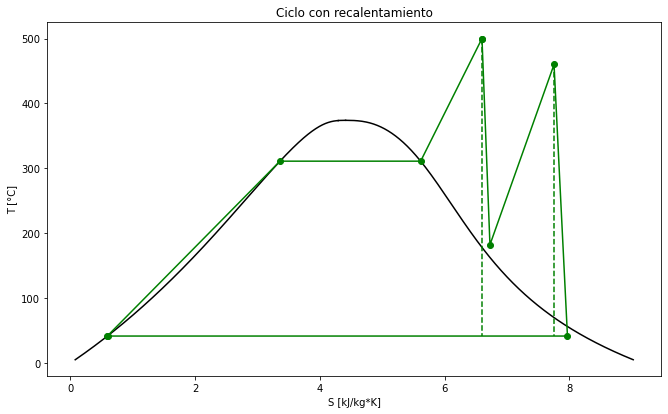

In [61]:
# e) Dibujo del ciclo de vapor

# Código para el tamaño del gráfico
plt.figure(figsize=(11.0,6.5))

# Código para el nombre de los ejes y el título
plt.title("Ciclo con recalentamiento")
plt.xlabel('S [kJ/kg*K]')
plt.ylabel('T [°C]')

# Código para los puntos de saturación y su color (campana)
svap=[s for s in [seu.tx2s(t, 1) for t in npt]]
sliq=[s for s in [seu.tx2s(t, 0) for t in npt]]
plt.plot(svap, npt, 'k')
plt.plot(sliq, npt, 'k')

# Le indicamos los puntos a señalar y unir
t=[t1rec,t2rec,t3rec,t4rec,t5rec,t6rec]
s=[s1rec,s2rec,s3rec,s4rec,s5rec,s6rec]

t.append(seu.px2t(p1rec,0))
s.append(seu.px2s(p1rec,0))

# Se añade el punto de sobrecalentamiento
t.append(seu.px2t(p1rec,1))
s.append(seu.px2s(p1rec,1))

t.append(t1rec)
s.append(s1rec)

plt.plot(s, t, 'go-')

# Se añade la representación de la expansión isoentrópica en las fases de la turbina para poder comparar la diferencia entre el 
# proceso real y el ideal
tb=[t1rec,t4rec]
sb=[s1rec,s2rec_id]
plt.plot(sb, tb, 'g--')

tb=[t3rec,t4rec]
sb=[s3rec,s4rec_id]
plt.plot(sb, tb, 'g--')

# Ejercicio 5: Ciclo de Rankine regenerativo
Un ciclo de Rankine regenerativo con irreversibilidades en la turbina, trabaja con vapor de agua. El
vapor entra a la turbina a una temperatura de 480 ºC y a una presión de 8 MPa, y se expande hasta
los 0.7 MPa, donde parte del vapor se desvía hacia el intercambiador de calor regenerativo. El vapor
restante se expanda en la segunda etapa de la turbina hasta los 0,008 MPa, y sale hacia la bomba
como líquido saturado. Ambos flujos de vapor se mezclan en el intercambiador de calor a una
presión de 0.7 MPa. El trabajo neto del ciclo es de 100 MW. El rendimiento de la turbina (ηt) es
0.85. 

Se pide:

a) Cálculo de todos los estados del ciclo

b) El rendimiento térmico del ciclo en % (ηth)

c) El flujo másico de vapor en kg/s (ṁ) total y de las fracciones separadas tras la primera etapa
de la turbina

d) (Opcional) Dibujo del ciclo de vapor

In [62]:
# a) Cálculo de todos los estados del ciclo
# Se utilizará el sufijo 'rg' para las variables del ciclo con regeneración
# Se supone para este ciclo dos fases de turbinado con mismo rendimiento 'ηturb_rg=0.85' 
# Este ciclo cuenta con la presencia de dos bombas: una tras el condensador y otra tras el regenerador. Al no darse
# los rendimientos de cada una, se presuponen 'ηpump_rg=0.81'
# Se denominará 'ṁrg' al flujo másico total (el saliente de la caldera), 'ṁe' al flujo másico que se dirige al regenerador
# tras el primer turbinado (flujo másico del sangrado) y 'ṁrg-ṁe' al flujo másico que se somete al segundo turbinado 
# y que atravesará también el condensador


# Estado 1

t1rg=480
p1rg=8

h1rg=seu.pt2h(p1rg,t1rg)
s1rg=seu.pt2s(p1rg,t1rg)
v1rg=seu.pt2v(p1rg,t1rg)
x1rg=seu.pt2x(p1rg,t1rg)

print(" p1rg= {} Mpa \n v1rg= {} m3/kg \n x1rg= {} p.u \n t1rg= {} ºC \n h1rg= {} KJ/Kg \n s1rg= {} KJ/Kg*K".format(p1rg,v1rg,x1rg,t1rg,h1rg,s1rg))

print("-----------------------------------")


# Estado 2 

ηturb_rg=0.85

p2rg=0.7
s2rg_id=s1rg
h2rg_id=seu.ps2h(p2rg,s2rg_id)
h2rg=h1rg-(ηturb_rg*(h1rg-h2rg_id))

s2rg=seu.ph2s(p2rg,h2rg)
v2rg=seu.ph2v(p2rg,h2rg)
t2rg=seu.ph2t(p2rg,h2rg)
x2rg=seu.ph2x(p2rg,h2rg)

print(" p2rg= {} Mpa \n v2rg= {} m3/kg \n x2rg= {} p.u \n t2rg= {} ºC \n h2rg= {} KJ/Kg \n s2rg= {} KJ/Kg*K".format(p2rg,v2rg,x2rg,t2rg,h2rg,s2rg))

print("-----------------------------------")


# Estado 3
# Aquí surge el problema de si suponer s3rg_id=s1rg. Si se realiza esa suposición, se está indicando que el segundo turbinado
# sería ideal siendo también el primero. 
# Por el contrario, se supone que s3rg_id=s2rg ya que existe la posibilidad de que siendo ideal el segundo, el primero no lo sea

p3rg=0.008
s3rg_id=s2rg
h3rg_id=seu.ps2h(p3rg,s3rg_id)
h3rg=h2rg-(ηturb_rg*(h2rg-h3rg_id))

s3rg=seu.ph2s(p3rg,h3rg)
v3rg=seu.ph2v(p3rg,h3rg)
t3rg=seu.ph2t(p3rg,h3rg)
x3rg=seu.ph2x(p3rg,h3rg)

print(" p3rg= {} Mpa \n v3rg= {} m3/kg \n x3rg= {} p.u \n t3rg= {} ºC \n h3rg= {} KJ/Kg \n s3rg= {} KJ/Kg*K".format(p3rg,v3rg,x3rg,t3rg,h3rg,s3rg))

print("-----------------------------------")


# Estado 4

p4rg=p3rg
x4rg=0

h4rg=seu.px2h(p4rg,x4rg)
v4rg=seu.px2v(p4rg,x4rg)
t4rg=seu.px2t(p4rg,x4rg)
s4rg=seu.px2s(p4rg,x4rg)

print(" p4rg= {} Mpa \n v4rg= {} m3/kg \n x4rg= {} p.u \n t4rg= {} ºC \n h4rg= {} KJ/Kg \n s4rg= {} KJ/Kg*K".format(p4rg,v4rg,x4rg,t4rg,h4rg,s4rg))

print("-----------------------------------")


# Estado 5

ηpump_rg=0.81

p5rg=p2rg
s5rg_id=s4rg
h5rg_id=seu.ps2h(p5rg,s5rg_id)
h5rg=h4rg+((h5rg_id-h4rg)/ηpump_rg)

s5rg=seu.ph2s(p5rg,h5rg)
v5rg=seu.ph2v(p5rg,h5rg)
t5rg=seu.ph2t(p5rg,h5rg)
x5rg=seu.ph2x(p5rg,h5rg)

print(" p5rg= {} Mpa \n v5rg= {} m3/kg \n x5rg= {} p.u \n t5rg= {} ºC \n h5rg= {} KJ/Kg \n s5rg= {} KJ/Kg*K".format(p5rg,v5rg,x5rg,t5rg,h5rg,s5rg))

print("-----------------------------------")


# Estado 6

p6rg=p2rg
x6rg=0

h6rg=seu.px2h(p6rg,x6rg)
v6rg=seu.px2v(p6rg,x6rg)
t6rg=seu.px2t(p6rg,x6rg)
s6rg=seu.px2s(p6rg,x6rg)

print(" p6rg= {} Mpa \n v6rg= {} m3/kg \n x6rg= {} p.u \n t6rg= {} ºC \n h6rg= {} KJ/Kg \n s6rg= {} KJ/Kg*K".format(p6rg,v6rg,x6rg,t6rg,h6rg,s6rg))

print("-----------------------------------")


# Estado 7

p7rg=p1rg
s7rg_id=s6rg
h7rg_id=seu.ps2h(p7rg,s7rg_id)
h7rg=h6rg+((h7rg_id-h6rg)/ηpump_rg)

s7rg=seu.ph2s(p7rg,h7rg)
v7rg=seu.ph2v(p7rg,h7rg)
t7rg=seu.ph2t(p7rg,h7rg)
x7rg=seu.ph2x(p7rg,h7rg)

print(" p7rg= {} Mpa \n v7rg= {} m3/kg \n x7rg= {} p.u \n t7rg= {} ºC \n h7rg= {} KJ/Kg \n s7rg= {} KJ/Kg*K".format(p7rg,v7rg,x7rg,t7rg,h7rg,s7rg))



 p1rg= 8 Mpa 
 v1rg= 0.040364941230239954 m3/kg 
 x1rg= 1.0 p.u 
 t1rg= 480 ºC 
 h1rg= 3349.5266902175404 KJ/Kg 
 s1rg= 6.661057438926857 KJ/Kg*K
-----------------------------------
 p2rg= 0.7 Mpa 
 v2rg= 0.2961202227927181 m3/kg 
 x2rg= 1.0 p.u 
 t2rg= 194.85028725291676 ºC 
 h2rg= 2833.6633994799113 KJ/Kg 
 s2rg= 6.863659692226502 KJ/Kg*K
-----------------------------------
 p3rg= 0.008 Mpa 
 v3rg= 15.642489399994753 m3/kg 
 x3rg= 0.8642450542210742 p.u 
 t3rg= 41.51005270424139 ºC 
 h3rg= 2250.102739075039 KJ/Kg 
 s3rg= 7.190938263751806 KJ/Kg*K
-----------------------------------
 p4rg= 0.008 Mpa 
 v4rg= 0.0010084729266462307 m3/kg 
 x4rg= 0 p.u 
 t4rg= 41.51005270424139 ºC 
 h4rg= 173.8517685972624 KJ/Kg 
 s4rg= 0.592531583591964 KJ/Kg*K
-----------------------------------
 p5rg= 0.7 Mpa 
 v5rg= 0.0010081897039087963 m3/kg 
 x5rg= 0.0 p.u 
 t5rg= 41.57007627048523 ºC 
 h5rg= 174.7132004608183 KJ/Kg 
 s5rg= 0.5930516719370847 KJ/Kg*K
-----------------------------------
 p6rg= 0.7 M

In [63]:
# b) El rendimiento térmico del ciclo en % (ηth)

# De cara a calcularlo, es necesario hallar la fracción de vapor: el porcentaje del flujo másico que se dirige al regenerador.
# La resta de esta fracción de vapor, en clase llamado sangrado, nos indica qué cantidad de flujo másico
# atravesará la segunda turbina, el condensador y la primera bomba.

# Para calcularlo, es necesario realizar un balance energético al regenerador que multiplica cada flujo másico
# que entra en el dispositivo por su entalpía. Se denomina [ṁe] al flujo másico desviado y [ṁrg] al total previo. 
# El flujo másico que atravesará la segunda turbina y la primera bomba será [ṁ-ṁe]

# Balance energético: 
# (dE/dT) = Q - W + ṁe*h2rg + (ṁrg-ṁe)*h5rg - ṁrg*h6rg

# Particularizando para el regenerador:
# (dE/dT)=0, Q=0, W=0

# La expresión resultante es:
# 0 = ṁe*h2rg + (ṁrg-ṁe)*h5rg - ṁrg*h6rg

# Se divide todo entre ṁrg para obtener la expresión con las fracciones de vapor ó sangrado
# 0 = (ṁe*h2rg)/ṁrg + ((ṁrg-ṁe)*h5rg)/ṁrg - (ṁrg*h6rg)/ṁrg

# Resultando para y=ṁe/ṁrg
# 0 = y*h2rg + (1-y)*h5rg - h6rg

# Despejando la y
y=(h6rg-h5rg)/(h2rg-h5rg)
print(" y= {} % (Fracc. vapor ó sangrado)".format(100*y))

# El último paso para el rendimiento es aplicar el porcentaje que atraviesa la segunda turbina y la primera bomba
# restando a la fracción extraída que se conoce
ηthrg=100*((h1rg-h2rg)+((1-y)*(h2rg-h3rg))-((1-y)*(h5rg-h4rg))-(h7rg-h6rg))/(h1rg-h7rg)

print(" ηthrg= {} %".format(ηthrg))

# El ratio de trabajo de retorno en % (back work ratio, bwr)

bwrrg=100*(((1-y)*(h5rg-h4rg))+(h7rg-h6rg))/((h1rg-h2rg)+((1-y)*(h2rg-h3rg)))

print(" bwrrg= {} %".format(bwrrg))

 y= 19.64798590518599 % (Fracc. vapor ó sangrado)
 ηthrg= 36.86427295447568 %
 bwrrg= 1.0822927348729534 %


In [64]:
# c) El flujo másico de vapor en kg/s (ṁrg) total y de las fracciones separadas tras la primera etapa de la turbina
Ẇcycle_rg=100000

ṁrg=Ẇcycle_rg/((h1rg-h2rg)+((1-y)*(h2rg-h3rg))-((1-y)*(h5rg-h4rg))-(h7rg-h6rg))

print(" ṁrg={} kg/s".format(ṁrg))

print("-----------------------------------")

ṁe=y*ṁrg

print(" ṁe={} kg/s".format(ṁe))

print("-----------------------------------")

ṁt2=(1-y)*ṁrg

print(" (ṁrg-ṁe)={} kg/s".format(ṁt2))

 ṁrg=102.65802322215369 kg/s
-----------------------------------
 ṁe=20.17023393323132 kg/s
-----------------------------------
 (ṁrg-ṁe)=82.48778928892237 kg/s


In [65]:
# De manera adicional, se calculan los trabajos y los calores cada uno con el flujo másico que lo atraviesa

Ẇt1_rg=ṁrg*(h1rg-h2rg)/1000
Ẇt2_rg=ṁt2*(h2rg-h3rg)/1000
Ẇpump1_rg=ṁt2*(h5rg-h4rg)/1000
Ẇpump2_rg=ṁrg*(h7rg-h6rg)/1000
Q̇cald_rg=ṁrg*(h1rg-h7rg)/1000
Q̇cond_rg=ṁt2*(h3rg-h4rg)/1000

print(" Ẇt1_rg= {} MW \n Ẇt2_rg= {} MW \n Ẇpump1_rg= {} MW \n Ẇpump2_rg= {} MW\n Q̇cald_rg= {} MW \n Q̇cond_rec= {} MW".format(Ẇt1_rg,Ẇt2_rg,Ẇpump1_rg,Ẇpump2_rg,Q̇cald_rg,Q̇cond_rg))

 Ẇt1_rg= 52.957505680000146 MW 
 Ẇt2_rg= 48.13662879278148 MW 
 Ẇpump1_rg= 0.0710576100477634 MW 
 Ẇpump2_rg= 1.0230768627338458 MW
 Q̇cald_rg= 271.26535256369147 MW 
 Q̇cond_rec= 171.26535256369144 MW


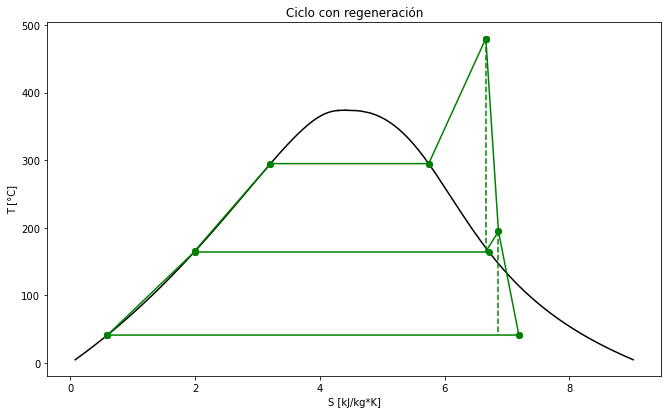

In [66]:
# d) Dibujo del ciclo de vapor

# Código para el tamaño del gráfico
plt.figure(figsize=(11.0,6.5))

# Código para el nombre de los ejes y el título
plt.title("Ciclo con regeneración")
plt.xlabel('S [kJ/kg*K]')
plt.ylabel('T [°C]')

# Código para los puntos de saturación y su color (campana)
svap=[s for s in [seu.tx2s(t, 1) for t in npt]]
sliq=[s for s in [seu.tx2s(t, 0) for t in npt]]
plt.plot(svap, npt, 'k')
plt.plot(sliq, npt, 'k')

# Le indicamos los puntos a señalar y unir
t=[t1rg,t2rg,t3rg,t4rg,t5rg,t6rg,t7rg]
s=[s1rg,s2rg,s3rg,s4rg,s5rg,s6rg,s7rg]

t.append(seu.px2t(p1rg,0))
s.append(seu.px2s(p1rg,0))

t.append(seu.px2t(p1rg,1))
s.append(seu.px2s(p1rg,1))

t.append(t1rg)
s.append(s1rg)

plt.plot(s, t, 'go-')

# Código para graficar el proceso de regeneración
t.append(t6rg)
s.append(seu.tx2s(t6rg,1))

plt.plot(s, t, 'go')

tb=[t2rg,t6rg]
sb=[s2rg,s1rg]
plt.plot(sb,tb, 'g-')

tb=[t6rg,t6rg]
sb=[s1rg,s6rg]
plt.plot(sb,tb, 'g-')

# Se añade la representación de las expansiones isoentrópicas en la turbina para poder comparar la diferencia entre el 
# proceso real y el ideal
tb=[t1rg,t6rg]
sb=[s1rg,s2rg_id]
plt.plot(sb, tb, 'g--')

tb=[t2rg,t3rg]
sb=[s2rg,s3rg_id]
plt.plot(sb, tb, 'g--')

# Ejercicio 6: Análisis de sensibilidad
Tomando uno de los ciclos desarrollados en los ejercicios anteriores, realizar un análisis de
sensibilidad variando sus propiedades iniciales (temperaturas, rendimientos de las turbinas y
bombas, presiones…) y ver qué impacto tienen sobre los parámetros de desempeño del ciclo
(rendimiento térmico del ciclo, potencias y calores, etc.). Se valorará positivamente la originalidad
del análisis y la presentación del mismo: gráficas, mapas de calor, o cualquier medio original que se
considere oportuno.

In [67]:
#Se va a realizar este ejercicio basando el ciclo con recalentamiento, que es el que más rendimiento ofrece

#Se va a estudiar qué efecto tiene en el ciclo una reducción de la temperatura de entrada de las turbinas en un 20% 
#El objetivo de esta propuesta, es observar la variabilidad en la cantidad de combustible y el efecto de esto sobre el rendimiento

# a) Cálculo de todos los estados del ciclo


# Estado 1

p1rec=10
t1rec=0.8*500

h1rec=seu.pt2h(p1rec,t1rec)
s1rec=seu.pt2s(p1rec,t1rec)
v1rec=seu.pt2v(p1rec,t1rec)
x1rec=seu.pt2x(p1rec,t1rec)

print(" p1rec= {} Mpa \n v1rec= {} m3/kg \n x1rec= {} p.u \n t1rec= {} ºC \n h1rec= {} KJ/Kg \n s1rec= {} KJ/Kg*K".format(p1rec,v1rec,x1rec,t1rec,h1rec,s1rec))

print("-----------------------------------")


# Estado 2 

ηturb_hp=0.91

p2rec=0.8
s2rec_id=s1rec
h2rec_id=seu.ps2h(p2rec,s2rec_id)
h2rec=h1rec-(ηturb_hp*(h1rec-h2rec_id))

s2rec=seu.ph2s(p2rec,h2rec)
v2rec=seu.ph2v(p2rec,h2rec)
t2rec=seu.ph2t(p2rec,h2rec)
x2rec=seu.ph2x(p2rec,h2rec)

print(" p2rec= {} Mpa \n v2rec= {} m3/kg \n x2rec= {} p.u \n t2rec= {} ºC \n h2rec= {} KJ/Kg \n s2rec= {} KJ/Kg*K".format(p2rec,v2rec,x2rec,t2rec,h2rec,s2rec))

print("-----------------------------------")


# Estado 3

p3rec=0.8
t3rec=0.8*460

s3rec=seu.pt2s(p3rec,t3rec)
v3rec=seu.pt2v(p3rec,t3rec)
h3rec=seu.pt2h(p3rec,t3rec)
x3rec=seu.pt2x(p3rec,t3rec)

print(" p3rec= {} Mpa \n v3rec= {} m3/kg \n x3rec= {} p.u \n t3rec= {} ºC \n h3rec= {} KJ/Kg \n s3rec= {} KJ/Kg*K".format(p3rec,v3rec,x3rec,t3rec,h3rec,s3rec))

print("-----------------------------------")


# Estado 4

ηturb_lp=0.93

p4rec=0.008
s4rec_id=s3rec
h4rec_id=seu.ps2h(p4rec,s4rec_id)
h4rec=h3rec-(ηturb_lp*(h3rec-h4rec_id))

s4rec=seu.ph2s(p4rec,h4rec)
v4rec=seu.ph2v(p4rec,h4rec)
t4rec=seu.ph2t(p4rec,h4rec)
x4rec=seu.ph2x(p4rec,h4rec)

print(" p4rec= {} Mpa \n v4rec= {} m3/kg \n x4rec= {} p.u \n t4rec= {} ºC \n h4rec= {} KJ/Kg \n s4rec= {} KJ/Kg*K".format(p4rec,v4rec,x4rec,t4rec,h4rec,s4rec))

print("-----------------------------------")


# Estado 5

x5rec=0
p5rec=p4rec

h5rec=seu.px2h(p5rec,x5rec)
v5rec=seu.px2v(p5rec,x5rec)
t5rec=seu.px2t(p5rec,x5rec)
s5rec=seu.px2s(p5rec,x5rec)

print(" p5rec= {} Mpa \n v5rec= {} m3/kg \n x5rec= {} p.u \n t5rec= {} ºC \n h5rec= {} KJ/Kg \n s5rec= {} KJ/Kg*K".format(p5rec,v5rec,x5rec,t5rec,h5rec,s5rec))

print("-----------------------------------")


# Estado 6

ηpumprec=0.88

p6rec=p1rec
s6rec_id=s5rec
h6rec_id=seu.ps2h(p6rec,s6rec_id)
h6rec=h5rec+((h6rec_id-h5rec)/ηpumprec)

s6rec=seu.ph2s(p6rec,h6rec)
v6rec=seu.ph2v(p6rec,h6rec)
t6rec=seu.ph2t(p6rec,h6rec)
x6rec=seu.ph2x(p6rec,h6rec)

print(" p6rec= {} Mpa \n v6rec= {} m3/kg \n x6rec= {} p.u \n t6rec= {} ºC \n h6rec= {} KJ/Kg \n s6rec= {} KJ/Kg*K".format(p6rec,v6rec,x6rec,t6rec,h6rec,s6rec))


 p1rec= 10 Mpa 
 v1rec= 0.02643930874103274 m3/kg 
 x1rec= 1.0 p.u 
 t1rec= 400.0 ºC 
 h1rec= 3097.3752744944654 KJ/Kg 
 s1rec= 6.213928893953556 KJ/Kg*K
-----------------------------------
 p2rec= 0.8 Mpa 
 v2rec= 0.2226772191866088 m3/kg 
 x2rec= 0.9262150256719099 p.u 
 t2rec= 170.41351082657434 ºC 
 h2rec= 2617.243621847353 KJ/Kg 
 s2rec= 6.32098390370485 KJ/Kg*K
-----------------------------------
 p3rec= 0.8 Mpa 
 v3rec= 0.36519748959696074 m3/kg 
 x3rec= 1.0 p.u 
 t3rec= 368.0 ºC 
 h3rec= 3200.0347558510334 KJ/Kg 
 s3rec= 7.470490424081761 KJ/Kg*K
-----------------------------------
 p4rec= 0.008 Mpa 
 v4rec= 16.75972196550168 m3/kg 
 x4rec= 0.9259759557678162 p.u 
 t4rec= 41.51005270424139 ºC 
 h4rec= 2398.4042464066692 KJ/Kg 
 s4rec= 7.662246246538501 KJ/Kg*K
-----------------------------------
 p5rec= 0.008 Mpa 
 v5rec= 0.0010084729266462307 m3/kg 
 x5rec= 0 p.u 
 t5rec= 41.51005270424139 ºC 
 h5rec= 173.8517685972624 KJ/Kg 
 s5rec= 0.592531583591964 KJ/Kg*K
-----------------

In [68]:
# El rendimiento térmico del ciclo en % (ηth)

ηthrec=100*(h1rec-h2rec+h3rec-h4rec+h5rec-h6rec)/(h1rec-h6rec+h3rec-h2rec)

print(" ηthrec= {} %".format(ηthrec))

# El ratio de trabajo de retorno en % (back work ratio, bwr)

bwrrec=100*(h6rec-h5rec)/(h1rec-h2rec+h3rec-h4rec)

print(" bwrrec= {} %".format(bwrrec))

 ηthrec= 36.34839316522231 %
 bwrrec= 0.8914656254246602 %


In [69]:
# c) El flujo másico de vapor en kg/s (ṁ)

Ẇcycle_rec=200000

ṁrec_2=Ẇcycle_rec/(h1rec-h2rec+h3rec-h4rec+h5rec-h6rec)

print(" ṁrec_2= {} kg/s".format(ṁrec_2))

Ẇt1_rec=ṁrec_2*(h1rec-h2rec)/1000
Ẇt2_rec=ṁrec_2*(h3rec-h4rec)/1000
Ẇpump_rec=ṁrec_2*(h6rec-h5rec)/1000
Q̇cald_rec=ṁrec_2*(h1rec-h6rec)/1000
Q̇rec_rec=ṁrec_2*(h3rec-h2rec)/1000
Q̇total_rec2=Q̇cald_rec+Q̇rec_rec

print(" Ẇt1_rec= {} MW \n Ẇt2_rec= {} MW \n Ẇpump_rec= {} MW \n Q̇cald_rec= {} MW \n Q̇rec_rec= {} MW".format(Ẇt1_rec,Ẇt2_rec,Ẇpump_rec,Q̇cald_rec,Q̇rec_rec))
print("-----------------------------------")
print(" Q̇total_rec2= {} MW".format(Q̇total_rec2))

 ṁrec_2= 157.43869994320147 kg/s
 Ẇt1_rec= 75.59130319434215 MW 
 Ẇt2_rec= 126.20766524172699 MW 
 Ẇpump_rec= 1.7989684360691163 MW 
 Q̇cald_rec= 458.476771585777 MW 
 Q̇rec_rec= 91.75387847596355 MW
-----------------------------------
 Q̇total_rec2= 550.2306500617406 MW


In [70]:
# Para ambos casos, el del ejercicio 4, cuyo calor total es Q̇total_rec=516.7598 MW y en éste 
# cuyo calor total es Q̇total_rec2= 550.2306 MW, se propone un rendimiento del 85% en la caldera y carbón como combustible
# que tiene 33000 kJ/kg de poder calorífico 

Lc=33000
ṁcomb_ej4=(516.7598*1000)/(0.85*Lc)

ṁcomb_sens=(Q̇total_rec2*1000)/(0.85*Lc) 


print(" ṁcomb_ej4= {} kg/s \n ṁcomb_sens= {} kg/s".format(ṁcomb_ej4,ṁcomb_sens))


 ṁcomb_ej4= 18.42280926916221 kg/s 
 ṁcomb_sens= 19.616065955855277 kg/s


In [71]:
# De aquí resulta la paradoja que quería estudiar. En un principio, al reducir la temperatura de entrada a las turbinas, 
# debería resultar en un menor aporte de calor por parte de la caldera. 

# Lo que sucede es que al variar estos puntos y sus entalpías, el proceso reduce su rendimiento en un 2% y esto afecta
# directamente al trabajo que el ciclo es capaz de llevar a cabo. 

# Esta pérdida en la eficiencia desemboca en la necesidad de un mayor flujo másico de combustible ya que es necesario 
# un mayor aporte de calor (a pesar de tener que alcanzar temperaturas menores) para producir la misma potencia 


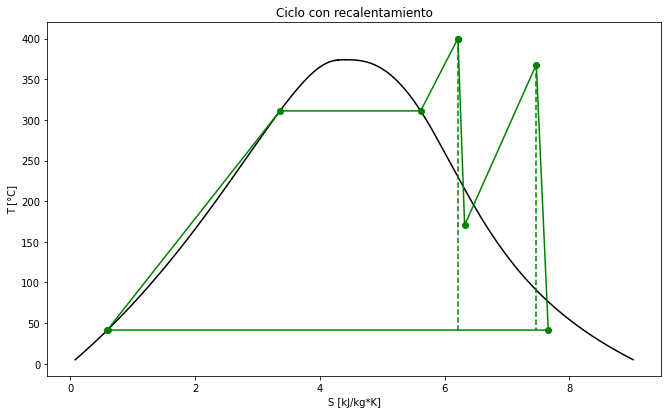

In [72]:
# e) Dibujo del ciclo de vapor

# Código para el tamaño del gráfico
plt.figure(figsize=(11.0,6.5))

# Código para el nombre de los ejes y el título
plt.title("Ciclo con recalentamiento")
plt.xlabel('S [kJ/kg*K]')
plt.ylabel('T [°C]')

# Código para los puntos de saturación y su color (campana)
svap=[s for s in [seu.tx2s(t, 1) for t in npt]]
sliq=[s for s in [seu.tx2s(t, 0) for t in npt]]
plt.plot(svap, npt, 'k')
plt.plot(sliq, npt, 'k')

# Le indicamos los puntos a señalar y unir
t=[t1rec,t2rec,t3rec,t4rec,t5rec,t6rec]
s=[s1rec,s2rec,s3rec,s4rec,s5rec,s6rec]

t.append(seu.px2t(p1rec,0))
s.append(seu.px2s(p1rec,0))

# Se añade el punto de sobrecalentamiento
t.append(seu.px2t(p1rec,1))
s.append(seu.px2s(p1rec,1))

t.append(t1rec)
s.append(s1rec)

plt.plot(s, t, 'go-')

# Se añade la representación de la expansión isoentrópica en las fases de la turbina para poder comparar la diferencia entre el 
# proceso real y el ideal
tb=[t1rec,t4rec]
sb=[s1rec,s2rec_id]
plt.plot(sb, tb, 'g--')

tb=[t3rec,t4rec]
sb=[s3rec,s4rec_id]
plt.plot(sb, tb, 'g--')